## The purpose of this homework is to implement Canny Edge Detector

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from skimage.io import imread
from skimage.transform import resize
from scipy.ndimage.filters import gaussian_filter
from tqdm import tqdm

In [22]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d
from scipy import ndimage
import cv2

### As you know from theory, Canny Edge Detection algorithm is composed of 4 steps: 
- Bluring the image to suppress the noise
- Calculation of the gradient and the magnitude of the image-gradient
- Non-maximum suppression
- Hystersis thresholding

#### At first let's read and visualize an image.

In [23]:
img = imread('tree.jpg')/255.
img = resize(img, (240, 320), preserve_range=True)
img = rgb2gray(img)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<IPython.core.display.Javascript object>


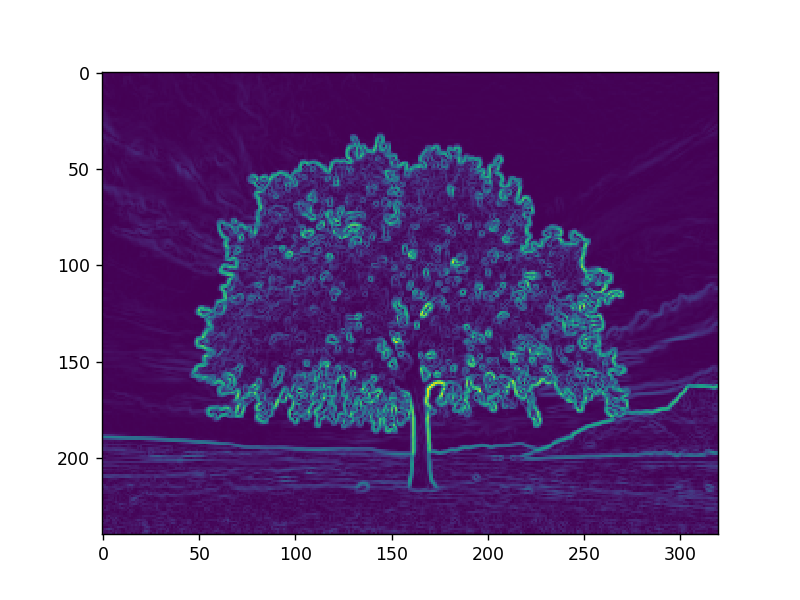

In [24]:
plt.imshow(img, cmap = 'gray')

In order to suppress the noise in the image, we apply bluring.

### Step 1: Gaussian blur

In [25]:
kernel_size = 5
sigma = 1.4

size = int(kernel_size) // 2
x, y = np.mgrid[-size:size+1, -size:size+1]
normal = 1 / (2.0 * np.pi * sigma**2)
gaussian_kernel =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal

smooth_img = convolve2d(img, gaussian_kernel, boundary='symm', mode='same') # TODO get gaussian blured image with some sigma and kernel size
plt.imshow(smooth_img, cmap = 'gray')
plt.show()

### Step 2: Gradient Calculation

In [26]:
Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
G_x, G_y = convolve2d(img, Kx, boundary='symm', mode='same'), convolve2d(img, Ky, boundary='symm', mode='same') # TODO Calculate the gradient of the image
M = np.hypot(G_x, G_y) # TODO Compute the magnitude of the image gradient
M = M/M.max()

In [27]:
plt.imshow(M)

### Step 3: Non-Maximum Suppression

In [28]:
# # TODO Implement non-maximum suppression algorithm
# def non_max_suppression(img, D):
#     M, N = img.shape
#     Z = np.zeros((M,N), dtype=np.int32)
#     angle = D * 180. / np.pi
#     angle[angle < 0] += 180

#     for i in range(1,M-1):
#         for j in range(1,N-1):
#             try:
#                 q = 255
#                 r = 255

#                #angle 0
#                 if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
#                     q = img[i, j+1]
#                     r = img[i, j-1]
#                 #angle 45
#                 elif (22.5 <= angle[i,j] < 67.5):
#                     q = img[i+1, j-1]
#                     r = img[i-1, j+1]
#                 #angle 90
#                 elif (67.5 <= angle[i,j] < 112.5):
#                     q = img[i+1, j]
#                     r = img[i-1, j]
#                 #angle 135
#                 elif (112.5 <= angle[i,j] < 157.5):
#                     q = img[i-1, j-1]
#                     r = img[i+1, j+1]

#                 if (img[i,j] >= q) and (img[i,j] >= r):
#                     Z[i,j] = img[i,j]
#                 else:
#                     Z[i,j] = 0


#             except IndexError as e:
#                 pass

#     return Z

#### Note !!! for implementation of non-maximum suppression you can follow the following steps, but your own implementation is also applicable.

Defining four directions

In [29]:
d_x = (1, 1/np.sqrt(2), 0, 1/np.sqrt(2))
d_y = (0, 1/np.sqrt(2), 1, -1/np.sqrt(2))
D = np.array([[d_x[i], d_y[i]] for i in range(4)])

In [31]:
D

array([[ 1.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 0.        ,  1.        ],
       [ 0.70710678, -0.70710678]])

In [19]:
# TODO Obtain a matrix of shape (img.shape[0], img.shape[1]), 
# for which A[i,j] is the number of the closest direction from D in the point (i,j). 
# For example, if the direction D[1,:] is the closest to the gradient of the image in the point (i,j), 
# i.e. G[i,j,:], then A[i,j] = 1.

In [32]:
A = np.zeros((img.shape[0], img.shape[1]))

In [37]:
D[1:]

array([[ 0.70710678,  0.70710678],
       [ 0.        ,  1.        ],
       [ 0.70710678, -0.70710678]])

In [255]:
res = np.zeros((img.shape[0], img.shape[1]))
M_pad = np.zeros((img.shape[0]+2, img.shape[1]+2))
M_pad[1:-1,1:-1] = M.copy()
for i in tqdm(range(img.shape[0])):
    for j in range(img.shape[1]):
        M_p = # TODO Obtain the two values of pixels in M, 
        M_n = # which are one pixel far from the 
              # (i,j)th pixel trough the direction D[A[i,j]]
         
        if M_pad[i,j] >= M_p and M_pad[i,j] >= M_n:
            res[i,j] = M_pad[i,j]


100%|██████████| 240/240 [00:01<00:00, 185.13it/s]


<IPython.core.display.Javascript object>


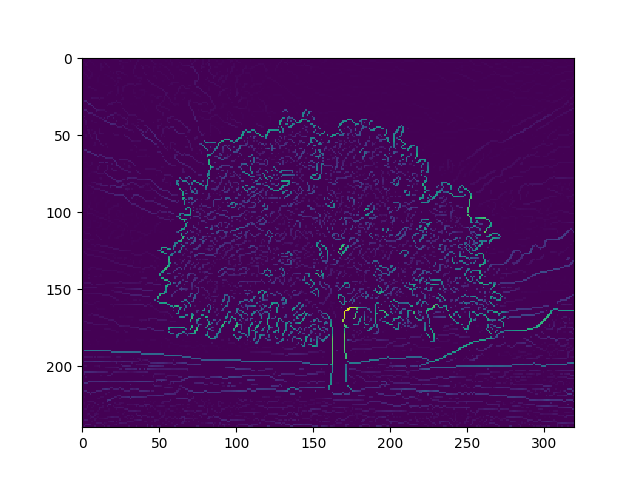

In [246]:
plt.imshow(res)

### Step 4: Hystersis Thresholding

In [248]:
def hyst(img, t_h, t_l):    
    # TODO Implement the hystersis thresholding with high threshold t_h, low threshold t_l
    return 

In [249]:
can_res = hyst(res, 0.2, 0.05)

<IPython.core.display.Javascript object>


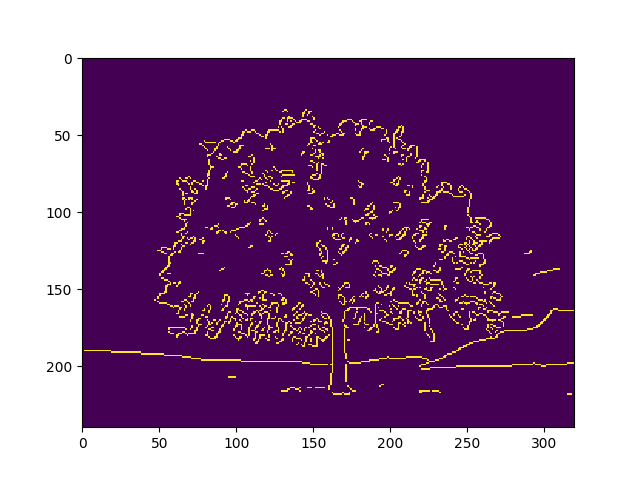

In [250]:
plt.imshow(can_res)